In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv("C:/Users/madhu/Desktop/NOTES/5th SEM/Uni_linear.txt", header=None)

In [5]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Profit\xa0Prediction')

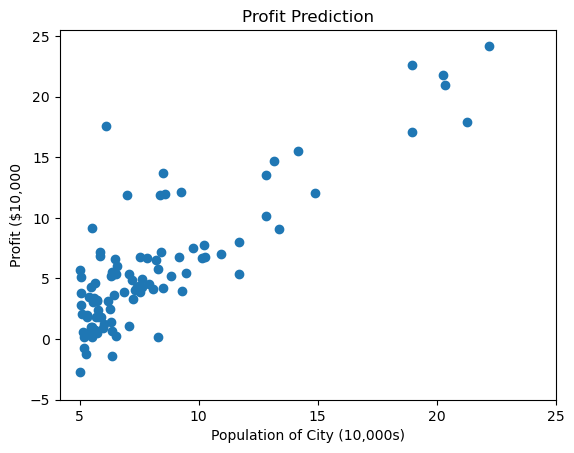

In [7]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel ("Population of City (10,000s)")
plt.ylabel ("Profit ($10,000")
plt.title("Profit Prediction")

In [8]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using thei in a linear regression model
    """
    m=len(y)
    X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
    predictions=X.dot(theta)  #dot is like dot product
    square_err=(predictions - y)**2
    return 1/(2*m)* np.sum(square_err)


In [9]:
data_n=data.values
m=97
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))
computeCost(X,y,theta)s

32.072733877455676

In [10]:
{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# Machine Learning - Andrew Ng ( Python Implementation)\n",
    "\n",
    "## Univariable Linear Regression"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Loading of Data"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "import numpy as np\n",
    "import matplotlib.pyplot as plt\n",
    "import pandas as pd"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "data=pd.read_csv(\"Uni_linear.txt\", header=None)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "data.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "data.describe()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Ploting of Data"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "plt.scatter(data[0],data[1])\n",
    "plt.xticks(np.arange(5,30,step=5))\n",
    "plt.yticks(np.arange(-5,30,step=5))\n",
    "plt.xlabel(\"Population of City (10,000s)\")\n",
    "plt.ylabel(\"Profit ($10,000\")\n",
    "plt.title(\"Profit Prediction\")"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Compute the Cost Function $J(\\Theta)$\n",
    "\n",
    "$J(\\Theta) = \\frac{1}{2m} \\sum_{i=1}^m (h_\\Theta(x^{(i)}) - y^{(i)} )^2$"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "def computeCost(X,y,theta):\n",
    "    \"\"\"\n",
    "    Take in a numpy array X,y, theta and generate the cost function of using theta as parameter\n",
    "    in a linear regression model\n",
    "    \"\"\"\n",
    "    m=len(y)\n",
    "    X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)\n",
    "    predictions=X.dot(theta)\n",
    "    square_err=(predictions - y)**2\n",
    "    \n",
    "    return 1/(2*m) * np.sum(square_err)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)\n",
    "print(X)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "data_n=data.values\n",
    "m=97\n",
    "X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)\n",
    "y=data_n[:,1].reshape(m,1)\n",
    "theta=np.zeros((2,1))\n",
    "#print(y)\n",
    "#print(m)\n",
    "#print(X)\n",
    "computeCost(X,y,theta)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Gradient Descent\n",
    "\n",
    "Minimize the cost function $J(\\Theta)$ \n",
    "\n",
    "By updating Equation and repeat unitil convergence\n",
    "        \n",
    "$\\Theta_j := \\Theta_j - \\alpha \\frac{1}{m} \\sum_{i=1}^m (h_{\\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\\Theta_j$ for all $j$)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "def gradientDescent(X,y,theta,alpha,num_iters):\n",
    "    \"\"\"\n",
    "    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps\n",
    "    with learning rate of alpha\n",
    "    \n",
    "    return theta and the list of the cost of theta during each iteration\n",
    "    \"\"\"\n",
    "    \n",
    "    m=len(y)\n",
    "    J_history=[]\n",
    "    \n",
    "    for i in range(num_iters):\n",
    "        predictions = X.dot(theta)    \n",
    "        error = np.dot(X.transpose(),(predictions -y))\n",
    "        descent=alpha * 1/m * error\n",
    "        theta-=descent\n",
    "        J_history.append(computeCost(X,y,theta))\n",
    "    \n",
    "    return theta, J_history"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "print(theta)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "theta,J_history = gradientDescent(X,y,theta,0.01,1500)\n",
    "print(\"h(x) =\"+str(round(theta[0,0],2))+\" + \"+str(round(theta[1,0],2))+\"x1\")"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Visualising the Cost Function $J(\\Theta)$"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "from mpl_toolkits.mplot3d import Axes3D"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "#Generating values for theta0, theta1 and the resulting cost value\n",
    "theta0_vals=np.linspace(-10,10,100)\n",
    "theta1_vals=np.linspace(-1,4,100)\n",
    "J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))\n",
    "\n",
    "for i in range(len(theta0_vals)):\n",
    "    for j in range(len(theta1_vals)):\n",
    "        t=np.array([theta0_vals[i],theta1_vals[j]])\n",
    "        J_vals[i,j]=computeCost(X,y,t)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "#Generating the surface plot\n",
    "fig = plt.figure()\n",
    "ax = fig.add_subplot(111, projection='3d')\n",
    "surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap=\"coolwarm\")\n",
    "fig.colorbar(surf, shrink=0.5, aspect=5)\n",
    "ax.set_xlabel(\"$\\Theta_0$\")\n",
    "ax.set_ylabel(\"$\\Theta_1$\")\n",
    "ax.set_zlabel(\"$J(\\Theta)$\")\n",
    "\n",
    "#rotate for better angle\n",
    "ax.view_init(30,120)\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Testing the implementation\n",
    "\n",
    "Plot $J(\\Theta)$ against the number of iteration "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "plt.plot(J_history)\n",
    "plt.xlabel(\"Iteration\")\n",
    "plt.ylabel(\"$J(\\Theta)$\")\n",
    "plt.title(\"Cost function using Gradient Descent\")"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Graph with Line of Best Fit"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "plt.scatter(data[0],data[1])\n",
    "x_value=[x for x in range(25)]\n",
    "y_value=[y*theta[1]+theta[0] for y in x_value]\n",
    "plt.plot(x_value,y_value,color=\"r\")\n",
    "plt.xticks(np.arange(5,30,step=5))\n",
    "plt.yticks(np.arange(-5,30,step=5))\n",
    "plt.xlabel(\"Population of City (10,000s)\")\n",
    "plt.ylabel(\"Profit ($10,000\")\n",
    "plt.title(\"Profit Prediction\")"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Make predictions using the optimized $\\Theta$ values\n",
    "\n",
    "$h_\\Theta(x) = \\Theta^Tx$"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "def predict(x,theta):\n",
    "    \"\"\"\n",
    "    Takes in numpy array of x and theta and return the predicted value of y based on theta\n",
    "    \"\"\"\n",
    "    \n",
    "    predictions= np.dot(theta.transpose(),x)\n",
    "    \n",
    "    return predictions[0]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "predict1=predict(np.array([1,3.5]),theta)*10000\n",
    "print(\"For population = 35,000, we predict a profit of $\"+str(round(predict1,0)))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "predict2=predict(np.array([1,7]),theta)*10000\n",
    "print(\"For population = 70,000, we predict a profit of $\"+str(round(predict2,0)))"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Multivariable Linear Regression"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Loading of Data"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "data2=pd.read_csv(\"Multi_linear.txt\", header=None)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "data2.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "data2.describe()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Ploting of Data"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Create 2 subplot, 1 for each variable\n",
    "fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)\n",
    "\n",
    "axes[0].scatter(data2[0],data2[2],color=\"b\")\n",
    "axes[0].set_xlabel(\"Size (Square Feet)\")\n",
    "axes[0].set_ylabel(\"Prices\")\n",
    "axes[0].set_title(\"House prices against size of house\")\n",
    "axes[1].scatter(data2[1],data2[2],color=\"r\")\n",
    "axes[1].set_xlabel(\"Number of bedroom\")\n",
    "axes[1].set_ylabel(\"Prices\")\n",
    "axes[1].set_xticks(np.arange(1,6,step=1))\n",
    "axes[1].set_title(\"House prices against number of bedroom\")\n",
    "\n",
    "# Enhance layout\n",
    "plt.tight_layout()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Feature Normalization\n",
    "\n",
    "To make sure features are on a similar scale:\n",
    "\n",
    "$x_i = \\frac{x_i - \\mu_i}{\\sigma_i}$"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "def featureNormalization(X):\n",
    "    \"\"\"\n",
    "    Take in numpy array of X values and return normalize X values,\n",
    "    the mean and standard deviation of each feature\n",
    "    \"\"\"\n",
    "    mean=np.mean(X,axis=0)\n",
    "    std=np.std(X,axis=0)\n",
    "    \n",
    "    X_norm = (X - mean)/std\n",
    "    \n",
    "    return X_norm , mean , std"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "data_n2=data2.values\n",
    "m2=len(data_n2[:,-1])\n",
    "X2=data_n2[:,0:2].reshape(m2,2)\n",
    "X2, mean_X2, std_X2 = featureNormalization(X2)\n",
    "X2 = np.append(np.ones((m2,1)),X2,axis=1)\n",
    "y2=data_n2[:,-1].reshape(m2,1)\n",
    "theta2=np.zeros((3,1))"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Compute Cost $J(\\Theta)$\n",
    "\n",
    "In the multivariate case, the cost function can also be written in the following vectorized form:\n",
    "\n",
    "$J(\\Theta) = \\frac{1}{2m} (X\\Theta - \\overrightarrow{y})^T (X\\Theta - \\overrightarrow{y})$"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "computeCost(X2,y2,theta2)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Gradient Descent"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "theta2, J_history2 = gradientDescent(X2,y2,theta2,0.1,400)\n",
    "print(\"h(x) =\"+str(round(theta2[0,0],2))+\" + \"+str(round(theta2[1,0],2))+\"x1 + \"+str(round(theta2[2,0],2))+\"x2\")"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Visualising the Cost Function $J(\\Theta)$"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "plt.plot(J_history2)\n",
    "plt.xlabel(\"Iteration\")\n",
    "plt.ylabel(\"$J(\\Theta)$\")\n",
    "plt.title(\"Cost function using Gradient Descent\")"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Make predictions using the optimized $\\Theta$ values"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "#feature normalisation of x values\n",
    "x_sample = featureNormalization(np.array([1650,3]))[0]\n",
    "x_sample=np.append(np.ones(1),x_sample)\n",
    "predict3=predict(x_sample,theta2)\n",
    "print(\"For size of house = 1650, Number of bedroom = 3, we predict a house value of $\"+str(round(predict3,0)))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3 (ipykernel)",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.10.9"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 2
}

SyntaxError: invalid non-printable character U+00A0 (3913414018.py, line 554)